# Mini-Project on Big Data (MPBD)
# ...

## Requirement 1
### Consolidate 5 CSV files into a single CSV file

In [255]:
import pandas as pd

In [256]:
df1 = pd.read_csv("S1.csv").astype(float, errors='ignore')
df2 = pd.read_csv("S2.csv").astype(float, errors='ignore')
df3 = pd.read_csv("S3.csv").astype(float, errors='ignore')
df4 = pd.read_csv("S4.csv").astype(float, errors='ignore')
df5 = pd.read_csv("S5.csv").astype(float, errors='ignore')

In [257]:
# all students include those who are not completed all 5 semesters
df = pd.merge(df1, df2, on='Student', how='left')
df = pd.merge(df, df3, on='Student', how='left')
df = pd.merge(df, df4, on='Student', how='left')
df = pd.merge(df, df5, on='Student', how='left')

In [258]:
# if the students completed all 5 semesters, then their ID should be in every csv file. Which mean we can use inner join to get the students who completed all 5 semesters
all5SemDF = pd.merge(df1, df2, on='Student', how='inner')
all5SemDF = pd.merge(all5SemDF, df3, on='Student', how='inner')
all5SemDF = pd.merge(all5SemDF, df4, on='Student', how='inner')
all5SemDF = pd.merge(all5SemDF, df5, on='Student', how='inner')

# drop rows with NaN values
all5SemDF_noNaN = all5SemDF.dropna(how='any')
all5SemDF_noNaN.reset_index(drop=True, inplace=True)

In [259]:
studentWithNANDF = df[~df['Student'].isin(all5SemDF_noNaN['Student'])]
studentQuitDF = df[~df['Student'].isin(all5SemDF['Student'])]
studentMaybeExecemption = studentWithNANDF[~studentWithNANDF['Student'].isin(studentQuitDF['Student'])]

In [260]:
studentMaybeExecemption

,Student,L001,V001,V002,V003,V004,V005,V006,V007,L002,...,L004,V019,V020,V021,V022,V023,V024,L005,P001,V025
1,S002,55.0,31.0,39.0,56.0,50.0,58.0,51.0,60.0,49.0,...,50.0,NaN,71.0,52.0,53.0,47.0,60.0,56.0,NaN,50.0
3,S004,54.0,34.0,35.0,49.0,49.0,61.0,61.0,62.0,36.0,...,50.0,NaN,60.0,56.0,NaN,43.0,70.0,45.0,NaN,41.0
5,S006,62.0,63.0,55.0,63.0,63.0,66.0,62.0,75.0,59.0,...,66.0,NaN,75.0,56.0,61.0,61.0,71.0,48.0,71.0,54.0
15,S016,57.0,58.0,53.0,55.0,46.0,59.0,56.0,76.0,40.0,...,45.0,NaN,63.0,62.0,52.0,41.0,73.0,44.0,63.0,53.0
16,S017,48.0,40.0,39.0,52.0,42.0,59.0,43.0,76.0,52.0,...,42.0,NaN,61.0,57.0,39.0,35.0,57.0,45.0,NaN,48.0
19,S020,53.0,55.0,39.0,52.0,40.0,69.0,56.0,64.0,54.0,...,42.0,63.0,53.0,55.0,64.0,53.0,53.0,45.0,NaN,49.0
23,S024,52.0,71.0,44.0,57.0,43.0,60.0,51.0,73.0,43.0,...,52.0,NaN,57.0,51.0,60.0,48.0,62.0,40.0,NaN,45.0
24,S025,58.0,50.0,45.0,54.0,38.0,60.0,54.0,65.0,52.0,...,47.0,NaN,55.0,53.0,50.0,50.0,54.0,56.0,64.0,50.0
26,S027,39.0,50.0,37.0,53.0,24.0,55.0,63.0,73.0,36.0,...,47.0,NaN,61.0,48.0,48.0,45.0,72.0,45.0,NaN,50.0
36,S038,61.0,55.0,43.0,57.0,49.0,63.0,53.0,73.0,52.0,...,48.0,67.0,54.0,51.0,56.0,58.0,72.0,51.0,NaN,62.0


In [261]:
all5SemDF_noNaN

,Student,L001,V001,V002,V003,V004,V005,V006,V007,L002,...,L004,V019,V020,V021,V022,V023,V024,L005,P001,V025
0,S001,56.0,82.0,74.0,68.0,78.0,87.0,63.0,79.0,54.0,...,63.0,76.0,70.0,75.0,80.0,70.0,83.0,61.0,72.0,63.0
1,S003,52.0,83.0,88.0,79.0,85.0,66.0,62.0,74.0,56.0,...,67.0,74.0,69.0,80.0,81.0,79.0,74.0,60.0,64.0,70.0
2,S005,56.0,74.0,54.0,49.0,53.0,60.0,54.0,73.0,43.0,...,36.0,58.0,60.0,51.0,46.0,52.0,68.0,34.0,54.0,53.0
3,S007,61.0,85.0,76.0,79.0,79.0,64.0,66.0,82.0,66.0,...,46.0,11.0,62.0,67.0,84.0,0.0,0.0,63.0,61.0,48.0
4,S008,58.0,72.0,69.0,82.0,76.0,77.0,68.0,74.0,61.0,...,67.0,79.0,69.0,70.0,69.0,68.0,73.0,58.0,74.0,70.0
5,S010,59.0,56.0,42.0,60.0,33.0,65.0,60.0,67.0,50.0,...,50.0,56.0,61.0,47.0,43.0,50.0,64.0,40.0,67.0,54.0
6,S011,53.0,69.0,68.0,65.0,49.0,73.0,62.0,68.0,48.0,...,58.0,68.0,66.0,61.0,64.0,56.0,70.0,54.0,70.0,55.0
7,S012,58.0,72.0,65.0,60.0,65.0,69.0,63.0,64.0,51.0,...,55.0,74.0,71.0,71.0,70.0,67.0,74.0,60.0,74.0,63.0
8,S013,57.0,72.0,54.0,53.0,41.0,71.0,64.0,69.0,56.0,...,48.0,57.0,54.0,60.0,59.0,51.0,73.0,53.0,56.0,51.0
9,S014,50.0,87.0,92.0,80.0,75.0,72.0,71.0,82.0,59.0,...,49.0,74.0,65.0,75.0,86.0,72.0,79.0,58.0,70.0,74.0


In [262]:
all5SemDF_noNaN.to_csv("Yeung_Wing.csv", index=False)

## Requirement 2
### Count the number of students who completed all 5 semesters

In [263]:
print(f"Number of students who confirmed completed all 5 semesters: {len(all5SemDF_noNaN)}")
print(f"Number of students who may completed all 5 semesters (Maybe NaN results due to exemption): {len(all5SemDF)}")
print(f"Number of students who 100% did not completed all 5 semeters: {len(df)-len(all5SemDF_noNaN)}")

Number of students who confirmed completed all 5 semesters: 50
Number of students who may completed all 5 semesters (Maybe NaN results due to exemption): 67
Number of students who 100% did not completed all 5 semeters: 33


## Requirement 3
### Statistics (mean/ maximum/ minimum/ standard deviation of module marks) of the designated modules - V???, V???, V???

In [264]:
df.describe()

,L001,V001,V002,V003,V004,V005,V006,V007,L002,V008,...,L004,V019,V020,V021,V022,V023,V024,L005,P001,V025
count,83.000000,83.000000,83.000000,82.000000,83.000000,83.000000,83.000000,83.000000,78.000000,77.000000,...,67.000000,57.000000,67.000000,67.000000,64.000000,66.000000,67.000000,67.000000,55.000000,67.000000
mean,55.722892,64.795181,59.795181,61.743902,59.626506,65.012048,59.915663,66.987952,51.205128,62.285714,...,55.791045,66.964912,64.791045,63.671642,63.296875,58.590909,68.686567,52.850746,65.145455,55.552239
std,7.913115,19.124597,18.694436,15.717263,21.238891,9.621488,10.567097,11.508739,15.359213,22.402923,...,8.285689,13.162399,6.549433,9.233319,12.153358,13.800755,12.164540,9.879967,5.664765,9.340825
min,14.000000,18.000000,0.000000,19.000000,10.000000,35.000000,20.000000,0.000000,0.000000,0.000000,...,36.000000,11.000000,53.000000,45.000000,39.000000,0.000000,0.000000,0.000000,53.000000,30.000000
25%,52.000000,55.000000,45.000000,54.250000,46.000000,59.000000,56.000000,62.000000,49.000000,52.000000,...,49.500000,58.000000,60.500000,56.000000,53.000000,50.000000,63.000000,48.500000,61.000000,50.000000
50%,58.000000,68.000000,62.000000,62.000000,58.000000,65.000000,63.000000,69.000000,54.000000,67.000000,...,56.000000,70.000000,65.000000,65.000000,64.000000,58.500000,71.000000,54.000000,66.000000,55.000000
75%,61.000000,82.000000,73.500000,73.750000,78.500000,71.000000,67.000000,74.000000,60.000000,78.000000,...,63.000000,76.000000,70.000000,70.500000,72.000000,67.000000,74.000000,58.500000,69.500000,62.000000
max,73.000000,95.000000,93.000000,88.000000,95.000000,87.000000,78.000000,83.000000,69.000000,97.000000,...,70.000000,96.000000,79.000000,83.000000,86.000000,90.000000,89.000000,73.000000,75.000000,75.000000


In [265]:
all5SemDF_noNaN.describe()

,L001,V001,V002,V003,V004,V005,V006,V007,L002,V008,...,L004,V019,V020,V021,V022,V023,V024,L005,P001,V025
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,...,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,58.380000,75.240000,69.92000,69.340000,69.800000,68.220000,63.660000,69.94000,56.960000,72.220000,...,57.26000,68.140000,66.54000,66.200000,66.120000,61.660000,69.520000,54.000000,65.280000,57.260000
std,5.158271,11.174972,12.78047,9.908994,17.235464,8.514789,5.727164,7.38838,6.493199,12.704314,...,8.13862,13.116449,5.64678,8.932856,11.477822,13.654049,13.231441,10.843977,5.598979,9.464887
min,42.000000,49.000000,34.00000,49.000000,33.000000,50.000000,46.000000,52.00000,43.000000,42.000000,...,36.00000,11.000000,53.00000,45.000000,40.000000,0.000000,0.000000,0.000000,54.000000,30.000000
25%,55.250000,66.500000,64.25000,60.250000,57.250000,63.000000,61.000000,64.50000,52.250000,65.000000,...,50.50000,58.250000,64.00000,60.250000,59.250000,55.000000,65.000000,50.250000,61.000000,51.000000
50%,58.500000,77.000000,70.50000,70.000000,74.500000,68.000000,64.000000,71.50000,57.500000,74.500000,...,58.00000,71.000000,67.50000,67.000000,66.500000,63.500000,72.500000,55.000000,66.000000,58.000000
75%,61.000000,83.750000,78.75000,79.000000,84.000000,73.000000,67.000000,74.00000,62.000000,82.750000,...,63.75000,76.000000,70.00000,72.750000,75.000000,69.500000,77.000000,60.000000,69.750000,63.000000
max,73.000000,95.000000,93.00000,88.000000,95.000000,87.000000,74.000000,83.00000,69.000000,97.000000,...,70.00000,96.000000,79.00000,83.000000,86.000000,90.000000,89.000000,73.000000,75.000000,75.000000


In [266]:
df['V001'].describe()

count    83.000000
mean     64.795181
std      19.124597
min      18.000000
25%      55.000000
50%      68.000000
75%      82.000000
max      95.000000
Name: V001, dtype: float64

In [267]:
# mean of V001
df['V001'].mean()

64.79518072289157

In [268]:
# maximum value of V002
df['V002'].max()

93.0

In [269]:
# minimum value of V003
df['V003'].min()

19.0

In [270]:
# standard deviation of V004
df['V004'].std()

21.238891411158047

## Requirement 4
### Histogram of the designated module - V???

In [271]:
import matplotlib.pyplot as plt

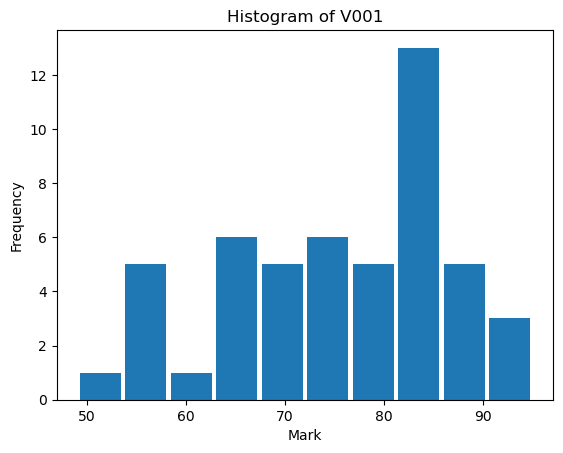

In [272]:
plt.hist(all5SemDF_noNaN['V001'], rwidth=0.9) # rwidth is added for the space between the bars, better visibility
plt.xlabel('Mark')
plt.ylabel('Frequency')
plt.title('Histogram of V001')
plt.show()

## Requirement 5 (NOT needed for those who completed Requirement 1)
### Box plot of the designated module - V???

In [273]:
# import matplotlib.pyplot as plt

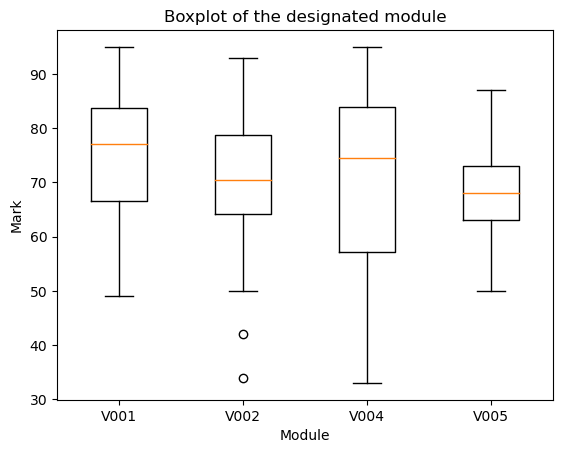

In [274]:
plt.boxplot([all5SemDF_noNaN['V001'],all5SemDF_noNaN['V002'],all5SemDF_noNaN['V004'],all5SemDF_noNaN['V005']],labels=['V001','V002','V004','V005'])
plt.ylabel('Mark')
plt.xlabel('Module')
plt.title('Boxplot of the designated module')
plt.show()

## Requirement 6
### Pie chart of the designated module - V???

In [275]:
# import matplotlib.pyplot as plt

In [276]:
V003GradeA = len(all5SemDF_noNaN[all5SemDF_noNaN['V003']>=70]['V003'])
V003GradeB = len(all5SemDF_noNaN[(all5SemDF_noNaN['V003']>=60) & (df['V003']<70)]['V003'])
V003GradeC = len(all5SemDF_noNaN[(all5SemDF_noNaN['V003']>=50) & (df['V003']<60)]['V003'])
V003GradeD = len(all5SemDF_noNaN[(all5SemDF_noNaN['V003']>=40) & (df['V003']<50)]['V003'])
V003GradeF = len(all5SemDF_noNaN[all5SemDF_noNaN['V003']<40]['V003'])

C:\Users\admin\AppData\Local\Temp\ipykernel_4480\4009642701.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  V003GradeB = len(all5SemDF_noNaN[(all5SemDF_noNaN['V003']>=60) & (df['V003']<70)]['V003'])
C:\Users\admin\AppData\Local\Temp\ipykernel_4480\4009642701.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  V003GradeC = len(all5SemDF_noNaN[(all5SemDF_noNaN['V003']>=50) & (df['V003']<60)]['V003'])
C:\Users\admin\AppData\Local\Temp\ipykernel_4480\4009642701.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  V003GradeD = len(all5SemDF_noNaN[(all5SemDF_noNaN['V003']>=40) & (df['V003']<50)]['V003'])


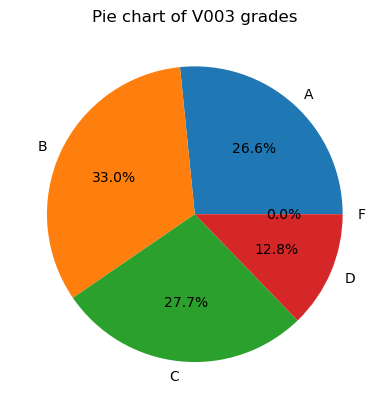

In [277]:
plt.pie([V003GradeA,V003GradeB,V003GradeC,V003GradeD,V003GradeF], labels=['A','B','C','D','F'], autopct='%.1f%%')
plt.title('Pie chart of V003 grades')
plt.show()

## Requirement 7A
### Underlying relationship about project module to other modules

In [278]:
all5SemDF_noNaN_stundentIndex = all5SemDF_noNaN.set_index('Student')

# grab all result of module start with letter L
lDF = all5SemDF_noNaN_stundentIndex.filter(regex='^L')
# grab all result of module start with letter V
vDF = all5SemDF_noNaN_stundentIndex.filter(regex='^V')
# grab all result of module start with letter P
pDF = all5SemDF_noNaN_stundentIndex.filter(regex='^P')
### Use all5SemDF_noNaN to avoid outliner that some students did not complete all the courses

print(f"Relationship between all language module: {lDF.corr().mean().mean()*100}%")
print(f"Relationship between all vocation module: {vDF.corr().mean().mean()*100}%")
print(f"Relationship between all project module: {pDF.corr().mean().mean()*100}% (100% because there is only one project module)")

Relationship between all language module: 57.835510276836324%
Relationship between all vocation module: 46.097306542476524%
Relationship between all project module: 100.0% (100% because there is only one project module)


In [279]:
meanDF = pd.DataFrame(lDF.mean(axis=1), columns=['LAN'])
meanDF = pd.merge(meanDF, pd.DataFrame(vDF.mean(axis=1), columns=['EEE']), on='Student', how='inner')
meanDF = pd.merge(meanDF, pd.DataFrame(pDF.mean(axis=1), columns=['PROJ']), on='Student', how='inner')

display(meanDF.corr())

,LAN,EEE,PROJ
LAN,1.000000,0.575835,0.300924
EEE,0.575835,1.000000,0.449187
PROJ,0.300924,0.449187,1.000000


In [280]:
lvCorr = meanDF.corr().loc["LAN", "EEE"]
lpCorr = meanDF.corr().loc["LAN", "PROJ"]
vpCorr = meanDF.corr().loc["EEE", "PROJ"]

print(f"Relationship between language and vocation module: {lvCorr*100}%")
print(f"Relationship between language and project module: {lpCorr*100}%")
print(f"Relationship between vocation and project module: {vpCorr*100}%")
print("")
print("We can see that in term of project module, the grade of vocation course is more related then language module.")

Relationship between language and vocation module: 57.583506636907224%
Relationship between language and project module: 30.092426414939265%
Relationship between vocation and project module: 44.91872964027379%

We can see that in term of project module, the grade of vocation course is more related then language module.


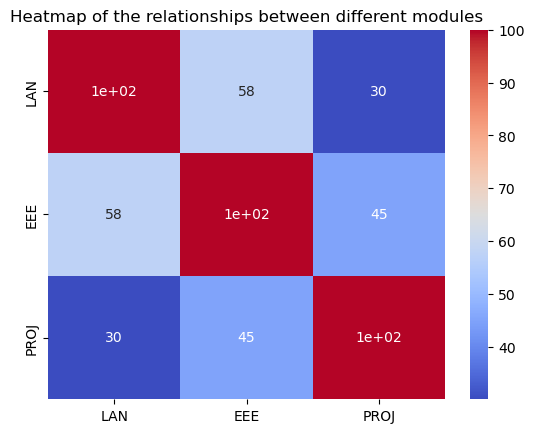

In [290]:
import seaborn as sns
sns.heatmap(meanDF.corr()*100, annot=True, cmap='coolwarm')
plt.title("Heatmap of the relationships between different modules")
plt.show()

## Requirement 7B
### Underlying relationship between the student who didn't finished all 5 sems to other students

In [282]:
# only compare the module studied by the withdrawn students
studentQuitNoNADF = studentQuitDF.dropna(how='any', axis=1)
studentQuitNoNADF

,Student,L001,V001,V002,V003,V004,V005,V006,V007
8,S009,58.0,82.0,47.0,46.0,69.0,64.0,58.0,64.0
14,S015,45.0,24.0,16.0,34.0,41.0,58.0,32.0,70.0
30,S031,58.0,20.0,25.0,23.0,19.0,59.0,46.0,47.0
32,S034,50.0,51.0,44.0,43.0,31.0,64.0,44.0,71.0
33,S035,42.0,28.0,36.0,22.0,40.0,58.0,33.0,60.0
34,S036,49.0,18.0,32.0,33.0,17.0,50.0,57.0,54.0
45,S048,49.0,42.0,45.0,35.0,56.0,45.0,41.0,65.0
46,S049,42.0,43.0,41.0,47.0,10.0,49.0,68.0,59.0
49,S052,40.0,50.0,0.0,24.0,70.0,40.0,28.0,0.0
60,S063,61.0,21.0,36.0,29.0,17.0,65.0,69.0,40.0


In [283]:
all5SemComparableDF = all5SemDF_noNaN[studentQuitNoNADF.columns]
all5SemComparableDF['quit'] = False
all5SemComparableDF

C:\Users\admin\AppData\Local\Temp\ipykernel_4480\2722242388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all5SemComparableDF['quit'] = False


,Student,L001,V001,V002,V003,V004,V005,V006,V007,quit
0,S001,56.0,82.0,74.0,68.0,78.0,87.0,63.0,79.0,False
1,S003,52.0,83.0,88.0,79.0,85.0,66.0,62.0,74.0,False
2,S005,56.0,74.0,54.0,49.0,53.0,60.0,54.0,73.0,False
3,S007,61.0,85.0,76.0,79.0,79.0,64.0,66.0,82.0,False
4,S008,58.0,72.0,69.0,82.0,76.0,77.0,68.0,74.0,False
5,S010,59.0,56.0,42.0,60.0,33.0,65.0,60.0,67.0,False
6,S011,53.0,69.0,68.0,65.0,49.0,73.0,62.0,68.0,False
7,S012,58.0,72.0,65.0,60.0,65.0,69.0,63.0,64.0,False
8,S013,57.0,72.0,54.0,53.0,41.0,71.0,64.0,69.0,False
9,S014,50.0,87.0,92.0,80.0,75.0,72.0,71.0,82.0,False


In [284]:
studentQuitNoNADF['quit'] = True
relationshipDF = pd.concat([studentQuitNoNADF, all5SemComparableDF]).reset_index(drop=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4480\2532102351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studentQuitNoNADF['quit'] = True


C:\Users\admin\AppData\Local\Temp\ipykernel_4480\2361699887.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.boxplot([relationshipDF[relationshipDF["quit"]==True].mean(axis=1), relationshipDF[relationshipDF["quit"]==False].mean(axis=1), relationshipDF.mean(axis=1)], labels=["Withdrawn student", "All Completed student", "ALL STUDENTS"])


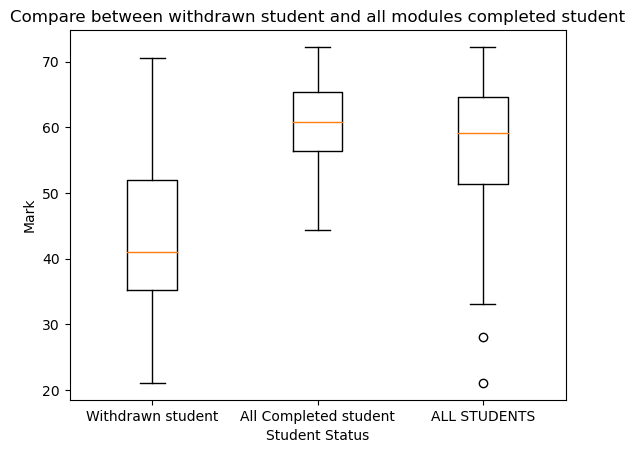

We can see although the mean of grade of the withdrawn students is much lower then the students completed all modules, there are still some examples that they get high marks.


In [285]:
plt.boxplot([relationshipDF[relationshipDF["quit"]==True].mean(axis=1), relationshipDF[relationshipDF["quit"]==False].mean(axis=1), relationshipDF.mean(axis=1)], labels=["Withdrawn student", "All Completed student", "ALL STUDENTS"])
plt.xlabel("Student Status")
plt.ylabel("Mark")
plt.title("Compare between withdrawn student and all modules completed student")
plt.show()

print("We can see although the mean of grade of the withdrawn students is much lower then the students completed all modules, there are still some examples that they get high marks.")

In [286]:
print("In Python, False = 0, True = 1, so we set false to be pass and true to be failed to see the relationship between withdrawn rate and pass rate to designated modules")

modules = []
for col, foo in enumerate(relationshipDF.columns.str.startswith(('L', 'V', 'P'))):
    if foo == True:
        modules.append(relationshipDF.columns[col])

passDF = relationshipDF.copy().set_index("Student")

for i in modules:
    passDF[i] = relationshipDF.set_index("Student")[i].apply(lambda x: True if x<40 else False)

passDF

In Python, False = 0, True = 1, so we set false to be pass and true to be failed to see the relationship between withdrawn rate and pass rate to designated modules


,L001,V001,V002,V003,V004,V005,V006,V007,quit
Student,,,,,,,,,
S009,False,False,False,False,False,False,False,False,True
S015,False,True,True,True,False,False,True,False,True
S031,False,True,True,True,True,False,False,False,True
S034,False,False,False,False,True,False,False,False,True
S035,False,True,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
S081,False,False,False,False,False,False,False,False,False
S082,False,False,False,False,False,False,False,False,False
S083,False,False,False,False,False,False,False,False,False


In [287]:
passDF.corr()

,L001,V001,V002,V003,V004,V005,V006,V007,quit
L001,1.000000,0.392232,0.333974,0.333974,0.312147,1.000000,0.488325,0.701646,0.219265
V001,0.392232,1.000000,0.851469,0.851469,0.488663,0.392232,0.582334,0.251558,0.559017
V002,0.333974,0.851469,1.000000,0.857759,0.393535,0.333974,0.683917,0.475986,0.548204
V003,0.333974,0.851469,0.857759,1.000000,0.393535,0.333974,0.683917,0.475986,0.656532
V004,0.312147,0.488663,0.393535,0.393535,1.000000,0.312147,0.084108,0.187317,0.393366
V005,1.000000,0.392232,0.333974,0.333974,0.312147,1.000000,0.488325,0.701646,0.219265
V006,0.488325,0.582334,0.683917,0.683917,0.084108,0.488325,1.000000,0.695971,0.449013
V007,0.701646,0.251558,0.475986,0.475986,0.187317,0.701646,0.695971,1.000000,0.312500
quit,0.219265,0.559017,0.548204,0.656532,0.393366,0.219265,0.449013,0.312500,1.000000


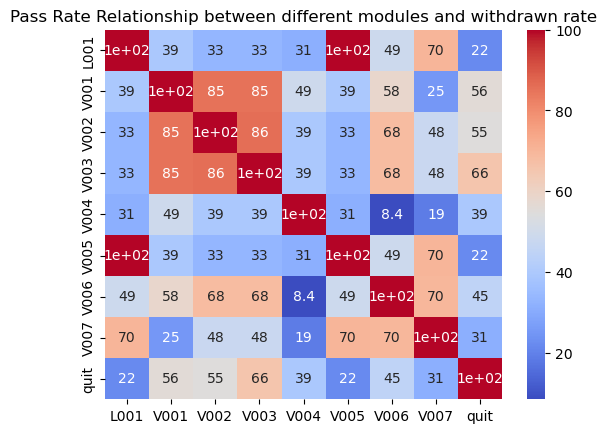

We can see the pass rate between V001, V002 and V003 are highly related, and most withdrawn students are also failed to these modules.


In [293]:
sns.heatmap(passDF.corr()*100, annot=True, cmap='coolwarm')
plt.title("Pass Rate Relationship between different modules and withdrawn rate")
plt.show()

print("We can see the pass rate between V001, V002 and V003 are highly related, and most withdrawn students are also failed to these modules.")